In [21]:
# To check counterparts: if an image has its equivalent spec

import os

def check_missing_counterparts(folder_a, folder_b):
    # Get the list of filenames without extensions in folder A
    filenames_a = {os.path.splitext(file)[0] for file in os.listdir(folder_a) if os.path.isfile(os.path.join(folder_a, file))}
    
    # Get the list of filenames without extensions in folder B
    filenames_b = {os.path.splitext(file)[0] for file in os.listdir(folder_b) if os.path.isfile(os.path.join(folder_b, file))}
    
    # Find filenames in A that are not in B
    missing_from_b = filenames_a - filenames_b
    
    if missing_from_b:
        print("Files in Folder A without a counterpart in Folder B:")
        for filename in missing_from_b:
            print(filename)
    else:
        print("All files in Folder A have counterparts in Folder B.")
        
    return missing_from_b

# Example usage
folder_a = 'screenshots'
# folder_a = 'EC2/data/extracted/screenshot'
folder_b = 'specs'
missing_files = check_missing_counterparts(folder_a, folder_b)


All files in Folder A have counterparts in Folder B.


### Check overlapping between folders

In [2]:
import os

def find_overlapping_files(folder_a, folder_b):
    # Get the list of file base names (without extensions) in folder A
    file_bases_a = {os.path.splitext(file)[0] for file in os.listdir(folder_a) if os.path.isfile(os.path.join(folder_a, file))}
    
    # Get the list of file base names (without extensions) in folder B
    file_bases_b = {os.path.splitext(file)[0] for file in os.listdir(folder_b) if os.path.isfile(os.path.join(folder_b, file))}
    
    # Find the intersection of file base names between folder A and B
    overlapping_files = file_bases_a.intersection(file_bases_b)
    
    if overlapping_files:
        print("Overlapping files (by name, ignoring extensions) between the two folders:")
        for file_base in overlapping_files:
            print(file_base)
    else:
        print("No overlapping files found between the two folders.")
        
    return overlapping_files

# Example usage
folder_a = 'EC2/data/extracted-1/screenshot'
folder_b = 'EC2/data/extracted-2.1/screenshot'
overlap = find_overlapping_files(folder_a, folder_b)


No overlapping files found between the two folders.


In [3]:
import os

def find_overlapping_files_deep(folder_a, folder_b):
    # Generate a set of all file base names (without extensions) in folder A, including subdirectories
    files_a = {os.path.splitext(os.path.relpath(os.path.join(root, file), folder_a))[0] 
               for root, dirs, files in os.walk(folder_a) 
               for file in files}
    
    # Generate a set of all file base names (without extensions) in folder B, including subdirectories
    files_b = {os.path.splitext(os.path.relpath(os.path.join(root, file), folder_b))[0] 
               for root, dirs, files in os.walk(folder_b) 
               for file in files}
    
    # Find the intersection of file base names between folder A and B
    overlapping_files = files_a.intersection(files_b)
    
    if overlapping_files:
        print("Overlapping files (by relative path and name, ignoring extensions) between the two folders and their subfolders:")
        for file_base in overlapping_files:
            print(file_base)
    else:
        print("No overlapping files found between the two folders and their subfolders.")
        
    return overlapping_files

# Example usage
folder_a = 'EC2/data/generated_specs'
folder_b = 'EC2/data/generated_specs_2'
overlap = find_overlapping_files_deep(folder_a, folder_b)


Overlapping files (by relative path and name, ignoring extensions) between the two folders and their subfolders:
.DS_Store


### [Turns out `extract` is unreliable so this is not used] Copying all files from folder A to folder B, where each file in A does not yet exist in B but has a counterpart (same name but different extension) in C 

In [11]:
import os
import shutil

def get_filenames_without_extension(folder_path):
    """Get a set of filenames without their extension for all files in the given folder."""
    return {os.path.splitext(filename)[0] for filename in os.listdir(folder_path)
            if os.path.isfile(os.path.join(folder_path, filename))}

def copy_files_a_to_b_with_c_counterpart(folder_a, folder_b, folder_c):
    files_b = get_filenames_without_extension(folder_b)
    files_c = get_filenames_without_extension(folder_c)

    for filename in os.listdir(folder_a):
        if os.path.isfile(os.path.join(folder_a, filename)):
            filename_without_ext = os.path.splitext(filename)[0]

            # Check if the file (by name, ignoring extension) does not exist in B but does exist in C
            if filename_without_ext not in files_b and filename_without_ext in files_c:
                source_file = os.path.join(folder_a, filename)
                destination_file = os.path.join(folder_b, filename)
                
                # Copy the file from A to B
                shutil.copy2(source_file, destination_file)
                print(f"Copied: {filename}")

# Example usage
folder_a = 'EC2/data/extracted/screenshot'
folder_b = 'screenshot_all'
folder_c = 'specs_all'
copy_files_a_to_b_with_c_counterpart(folder_a, folder_b, folder_c)


Copied: example_sim_layout_p_0_m_22_sw_1_2_s_0_7.png
Copied: example_sim_layout_p_3_m_8_sw_0_7_s_1_2.png
Copied: example_sim_layout_p_0_m_15_sw_1_0_s_0_7.png
Copied: breast_cancer_m_1_sw_0_7_s_1_0.png
Copied: example_sim_layout_p_2_m_19_sw_0_7_s_0_7.png
Copied: example_sim_layout_p_2_m_3_sw_1_2_s_1_0.png
Copied: example_sim_layout_p_3_m_5_sw_1_0_s_0_7.png
Copied: example_sim_layout_p_0_m_18_sw_0_7_s_1_2.png
Copied: example_sim_layout_p_2_m_14_sw_1_0_s_1_2.png
Copied: example_sim_layout_p_2_m_23_sw_1_2_s_1_2.png
Copied: basic_two_horizontal_orient_p_0_m_10_sw_1_2_s_1_0.png
Copied: basic_two_horizontal_orient_p_0_m_6_sw_0_7_s_1_2.png
Copied: breast_cancer_m_14_sw_0_7_s_1_0.png
Copied: basic_two_horizontal_orient_p_0_m_2_sw_1_2_s_0_7.png
Copied: example_sim_layout_p_1_m_11_sw_0_7_s_1_0.png
Copied: example_sim_layout_p_0_m_7_sw_1_0_s_1_2.png
Copied: circos_m_1_sw_1_2_s_1_2.png
Copied: complex_horizontal_m_7_sw_1_2_s_1_0.png
Copied: example_sim_layout_p_1_m_5_sw_0_7_s_1_0.png
Copied: exampl

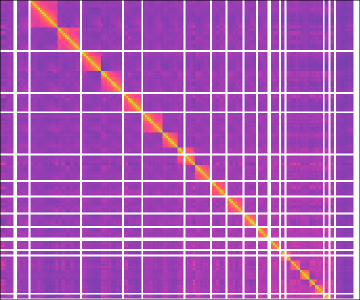

In [45]:
from IPython.display import Image

# Display an image by providing the path to the image file
display(Image(filename='screenshots/warm_heatmap_sw_1_2_s_0_5.png'))


In [46]:
import json

# Load the JSON file
with open('specs/warm_heatmap_sw_1_2_s_0_5.json', 'r') as file:
    data = json.load(file)

# Display the JSON data
# This prints the JSON data in a formatted string
print(json.dumps(data, indent=4))


{
    "tracks": [
        {
            "data": {
                "url": "https://higlass.io/api/v1/tileset_info/?d=CQMd6V_cRw6iCI_-Unl3PQ",
                "type": "matrix"
            },
            "mark": "rect",
            "x": {
                "field": "xs",
                "type": "genomic",
                "axis": "none"
            },
            "xe": {
                "field": "xe",
                "type": "genomic",
                "axis": "none"
            },
            "y": {
                "field": "ys",
                "type": "genomic",
                "axis": "none"
            },
            "ye": {
                "field": "ye",
                "type": "genomic",
                "axis": "none"
            },
            "color": {
                "field": "value",
                "type": "quantitative",
                "range": "warm"
            },
            "width": 360.0,
            "height": 300.0
        }
    ]
}


### Create folder `specs` contain only the coressponding files in screenshots

In [16]:
import os
import shutil

# Define the paths to your folders
folder_a_path = 'screenshots'
folder_b_path = 'specs_all'
folder_c_path = 'specs'

# Make sure folder C exists
if not os.path.exists(folder_c_path):
    os.makedirs(folder_c_path)

# List all files in folders A and B
files_in_a = os.listdir(folder_a_path)
files_in_b = os.listdir(folder_b_path)

# Create a set of file names (without extension) in folder A
file_names_in_a = set(os.path.splitext(file)[0] for file in files_in_a)

# Iterate over files in folder B
for file in files_in_b:
    file_name_without_extension, file_extension = os.path.splitext(file)
    
    # If the file (without its extension) exists in folder A, copy it to folder C
    if file_name_without_extension in file_names_in_a:
        source_file_path = os.path.join(folder_b_path, file)
        destination_file_path = os.path.join(folder_c_path, file)
        
        # Copy the file from B to C
        shutil.copy(source_file_path, destination_file_path)

print("Copying complete.")



Copying complete.


In [20]:
import os

def count_files_in_directory(directory):
    """Counts the number of files in the given directory."""
    try:
        # List all entries in the directory
        all_entries = os.listdir(directory)
        
        # Filter out directories, count only files
        file_count = sum(os.path.isfile(os.path.join(directory, entry)) for entry in all_entries)
        
        return file_count
    except FileNotFoundError:
        return "Directory not found."

# Example usage:
directory_path = 'specs'
print(count_files_in_directory(directory_path))


7296
